<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0606/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [43]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

答案是: airplane


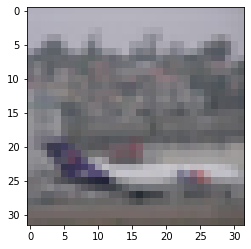

In [44]:
import matplotlib.pyplot as plt
idx = 30000
print("答案是:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [45]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.layers import Dense, Flatten
# layers = [
#     # 1 filter(3 * 3 * 3(previous depth)) * 64 + 64(bias) = 1792
#     Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
#     MaxPooling2D(),
#     # 1 filter(3 * 3 * 64(previous depth)) * 128 + 128(bias) = 73856
#     Conv2D(128, 3, padding="same", activation="relu"),
#     MaxPooling2D(),
#     Conv2D(256, 3, padding="same", activation="relu"),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(128, activation="relu"),
#     Dense(10, activation="softmax")
# ]
# model = Sequential(layers)
# model.summary()

In [46]:
# GAP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    # 1 filter(3 * 3 * 3(previous depth)) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1 filter(3 * 3 * 64(previous depth)) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 4, 4, 256)       

In [47]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [48]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [49]:
# batch_size: 你看多少筆再進行一次梯度下降(5[圖片大/訓練資料少]-200[圖片小/訓練資料多])
# epochs: 全體資料(60000) 你要看幾輪(我們什麼時候要停的關鍵)
# validation_split: 測試什麼時候停下來要用沒看過的資料(val loss穩定的時候就停, 不要過擬合)
# (60000 * 0.9) / 200 -> 270
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 5s - loss: 1.6607 - accuracy: 0.3812 - val_loss: 1.3836 - val_accuracy: 0.4926 - 5s/epoch - 23ms/step
Epoch 2/50
225/225 - 4s - loss: 1.2210 - accuracy: 0.5619 - val_loss: 1.0507 - val_accuracy: 0.6316 - 4s/epoch - 19ms/step
Epoch 3/50
225/225 - 4s - loss: 1.0176 - accuracy: 0.6415 - val_loss: 0.9165 - val_accuracy: 0.6794 - 4s/epoch - 19ms/step
Epoch 4/50
225/225 - 4s - loss: 0.8652 - accuracy: 0.6982 - val_loss: 0.8324 - val_accuracy: 0.7112 - 4s/epoch - 19ms/step
Epoch 5/50
225/225 - 4s - loss: 0.7684 - accuracy: 0.7321 - val_loss: 0.7909 - val_accuracy: 0.7238 - 4s/epoch - 20ms/step
Epoch 6/50
225/225 - 4s - loss: 0.6813 - accuracy: 0.7619 - val_loss: 0.7351 - val_accuracy: 0.7500 - 4s/epoch - 20ms/step
Epoch 7/50
225/225 - 4s - loss: 0.6110 - accuracy: 0.7888 - val_loss: 0.7702 - val_accuracy: 0.7396 - 4s/epoch - 19ms/step
Epoch 8/50
225/225 - 4s - loss: 0.5425 - accuracy: 0.8108 - val_loss: 0.6825 - val_accuracy: 0.7662 - 4s/epoch - 20ms/step
Epoch 9/50
225/2

In [50]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6836 - accuracy: 0.7787


[0.6835906505584717, 0.7786999940872192]

In [54]:
pre = model.predict(x_test_norm).argmax(axis=-1)
print(pre.shape)
print(y_test.shape)
y_test_r = y_test.reshape(10000)
print(y_test_r.shape)

(10000,)
(10000, 1)
(10000,)


In [56]:
# 雙方向(axis=1)
# 在tf用y_test_cat(十個機率), 出tf用y_test(確實答案)
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(trans[i]) for i in range(10)],
      index=["{}(真實)".format(trans[i]) for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),816,14,44,19,22,12,5,13,37,18
automobile(真實),20,882,3,8,4,4,4,3,31,41
bird(真實),58,4,658,75,68,69,42,16,7,3
cat(真實),15,5,51,625,36,188,44,24,5,7
deer(真實),8,3,46,82,725,48,42,39,7,0
dog(真實),10,3,14,118,34,770,14,32,3,2
frog(真實),5,4,39,76,10,25,826,6,7,2
horse(真實),12,1,19,45,47,63,8,796,3,6
ship(真實),49,18,13,18,4,7,2,2,873,14
truck(真實),29,68,11,24,2,11,7,12,20,816
